In [17]:
import torch
import os
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt


# Create a Dataset instance

From guide: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

In [47]:
import torchvision
from torchvision.models import resnet50, ResNet50_Weights, list_models
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms import ToTensor

In [3]:
weights = ResNet50_Weights.IMAGENET1K_V1
preprocess = weights.transforms()
model = resnet50(weights=weights)

In [58]:
def load_and_convert_image(file_path):
    # Load the image with transparency using PIL
    img = Image.open(file_path)

    # Check if the image has an alpha channel
    if img.mode == 'RGBA':
        # Create a white background
        new_img = Image.new("RGB", img.size, (255, 255, 255))

        # Paste the image onto the white background, using the alpha channel as a mask
        new_img.paste(img, (0, 0), img)

        # Convert the image to a NumPy array
        rgb_image = np.array(new_img)
        print('RGBA', rgb_image)
    else:
        # If the image doesn't have an alpha channel, just convert it to a NumPy array
        rgb_image = np.array(img)
        print('RGB', rgb_image)

    # Convert the NumPy array to a PyTorch tensor
    # torch_image = torch.from_numpy(np.transpose(rgb_image, (2, 0, 1))).float()
    torch_image = ToTensor()(rgb_image)

    return torch_image

In [59]:
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, exclude_labels=[]):
        self.img_dir = img_dir
        self.img_images = []
        self.img_labels = []
        self.transform = transform 
        for label in os.listdir(img_dir):
            if label in exclude_labels:
                continue
            for file in os.listdir(os.path.join(img_dir, label)):
                try:
                    image = load_and_convert_image(os.path.join(img_dir, label, file))
                    self.img_images.append(image)
                    self.img_labels.append(label)
                except Exception as e:
                    print("Problem opening", file, ':', str(e))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.img_images[idx]
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [60]:
# https://www.reddit.com/r/pokemon/comments/wx1qxp/all_officialsugimori_pokemon_art_collection_zip/

In [61]:
our_dataset = CustomImageDataset(img_dir='pokemon_or_digimon_data_samples/', transform=preprocess)

RGB [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
RGB [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 2

RGBA [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
RGBA [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255

In [62]:
rng = torch.Generator().manual_seed(42)
training_data, test_data = random_split(our_dataset, [0.7, 0.3], generator=rng)

In [63]:
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

In [64]:
train_features, train_labels = next(iter(train_dataloader))
train_features[0]

tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

        [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.

In [72]:
from sklearn.preprocessing import normalize

Feature batch shape: torch.Size([8, 3, 224, 224])
Labels batch shape: ('digimon', 'pokemon', 'digimon', 'pokemon', 'pokemon', 'digimon', 'digimon', 'digimon')


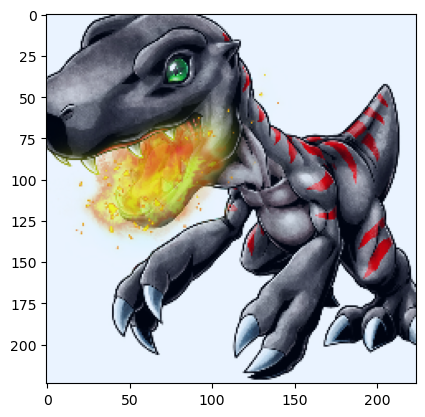

Label: digimon


In [82]:
print(f"Feature batch shape: {train_features.shape}")
print(f"Labels batch shape: {train_labels}")
img = train_features[6].squeeze()
label = train_labels[6]
rescaled_img = np.einsum('kij->ijk', img)
rescaled_img = (rescaled_img - np.min(rescaled_img))/(np.max(rescaled_img) - np.min(rescaled_img))

plt.imshow(rescaled_img, cmap="gray")
plt.show()
print(f"Label: {label}")